<a href="https://colab.research.google.com/github/gayathri1462/Hello-ML/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Import required libraries
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
from pandas import DataFrame
import matplotlib.pyplot as plt 
%matplotlib inline

In [85]:
# data generation
X, y = make_blobs(n_samples = 1500, centers = 3, n_features = 2, random_state = 20)
X = StandardScaler().fit_transform(X)

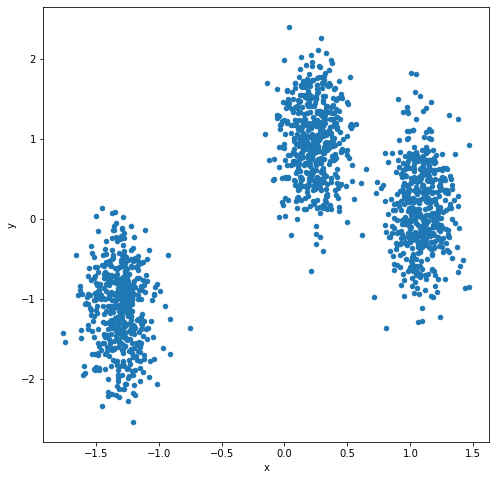

In [86]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

In [87]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

In [88]:
cluster = db.labels_
cluster[0:5]

array([0, 1, 0, 0, 0])

In [89]:
#create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[0:5]

array([ True,  True,  True,  True,  True])

In [90]:
# Number of clusters in labels
n_clusters_ = len(set(cluster))
n_clusters_

3

In [91]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(cluster)
unique_labels

{-1, 0, 1}

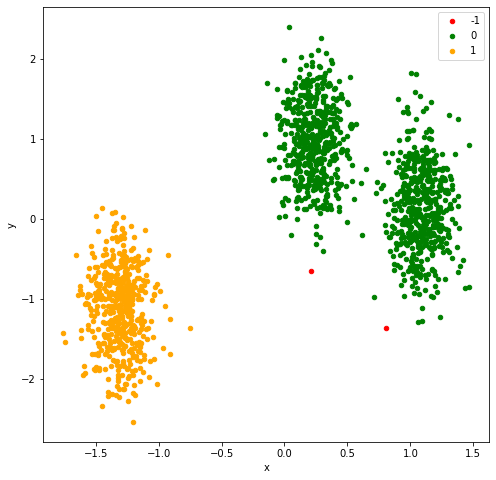

In [97]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
colors = {-1: 'red', 0: 'green', 1:'orange'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()